In [14]:
from get_dataframes import get_thresholds_df
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:

global_df = get_thresholds_df(results_path="../../../experiments/pyro-thresholds")

global_df

,threshold,dataset,lhs_size,rfi_prime_plus,mu_plus,g3_prime
0,0.1,abalone,1,0.033393,0.026728,0.042334
1,0.1,abalone,1,0.084993,0.065484,0.113272
2,0.1,abalone,1,0.006465,0.004750,0.008581
3,0.1,abalone,1,0.003690,0.002236,0.005635
4,0.1,abalone,1,0.070031,0.058429,0.205950
...,...,...,...,...,...,...
11714,0.15,ncvoter,2,0.983175,0.000000,0.987867
11715,0.15,ncvoter,2,0.978369,0.000000,0.985930
11716,0.15,ncvoter,4,1.000000,0.000000,1.000000
11717,0.15,ncvoter,3,0.006117,0.000000,0.664990


Text(0, 0.5, 'Densidade')

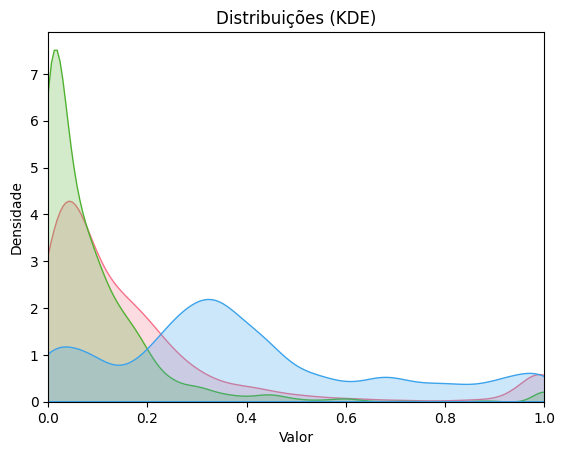

In [16]:
valid_columns=["rfi_prime_plus", "mu_plus", "g3_prime"]

palette = sns.color_palette("husl", len(valid_columns))
min_value = float("inf")
max_value = float("-inf")

for idx, col in enumerate(valid_columns):
    series = global_df[col].dropna()
    if series.empty:
        print(f"[Aviso] Coluna '{col}' está vazia. Ignorando.")
        continue
    sns.kdeplot(series, label=col, color=palette[idx], fill=True)
    min_value = min(min_value, series.min())
    max_value = max(max_value, series.max())

plt.xlim(min_value, max_value)
plt.title("Distribuições (KDE)")
plt.xlabel("Valor")
plt.ylabel("Densidade")

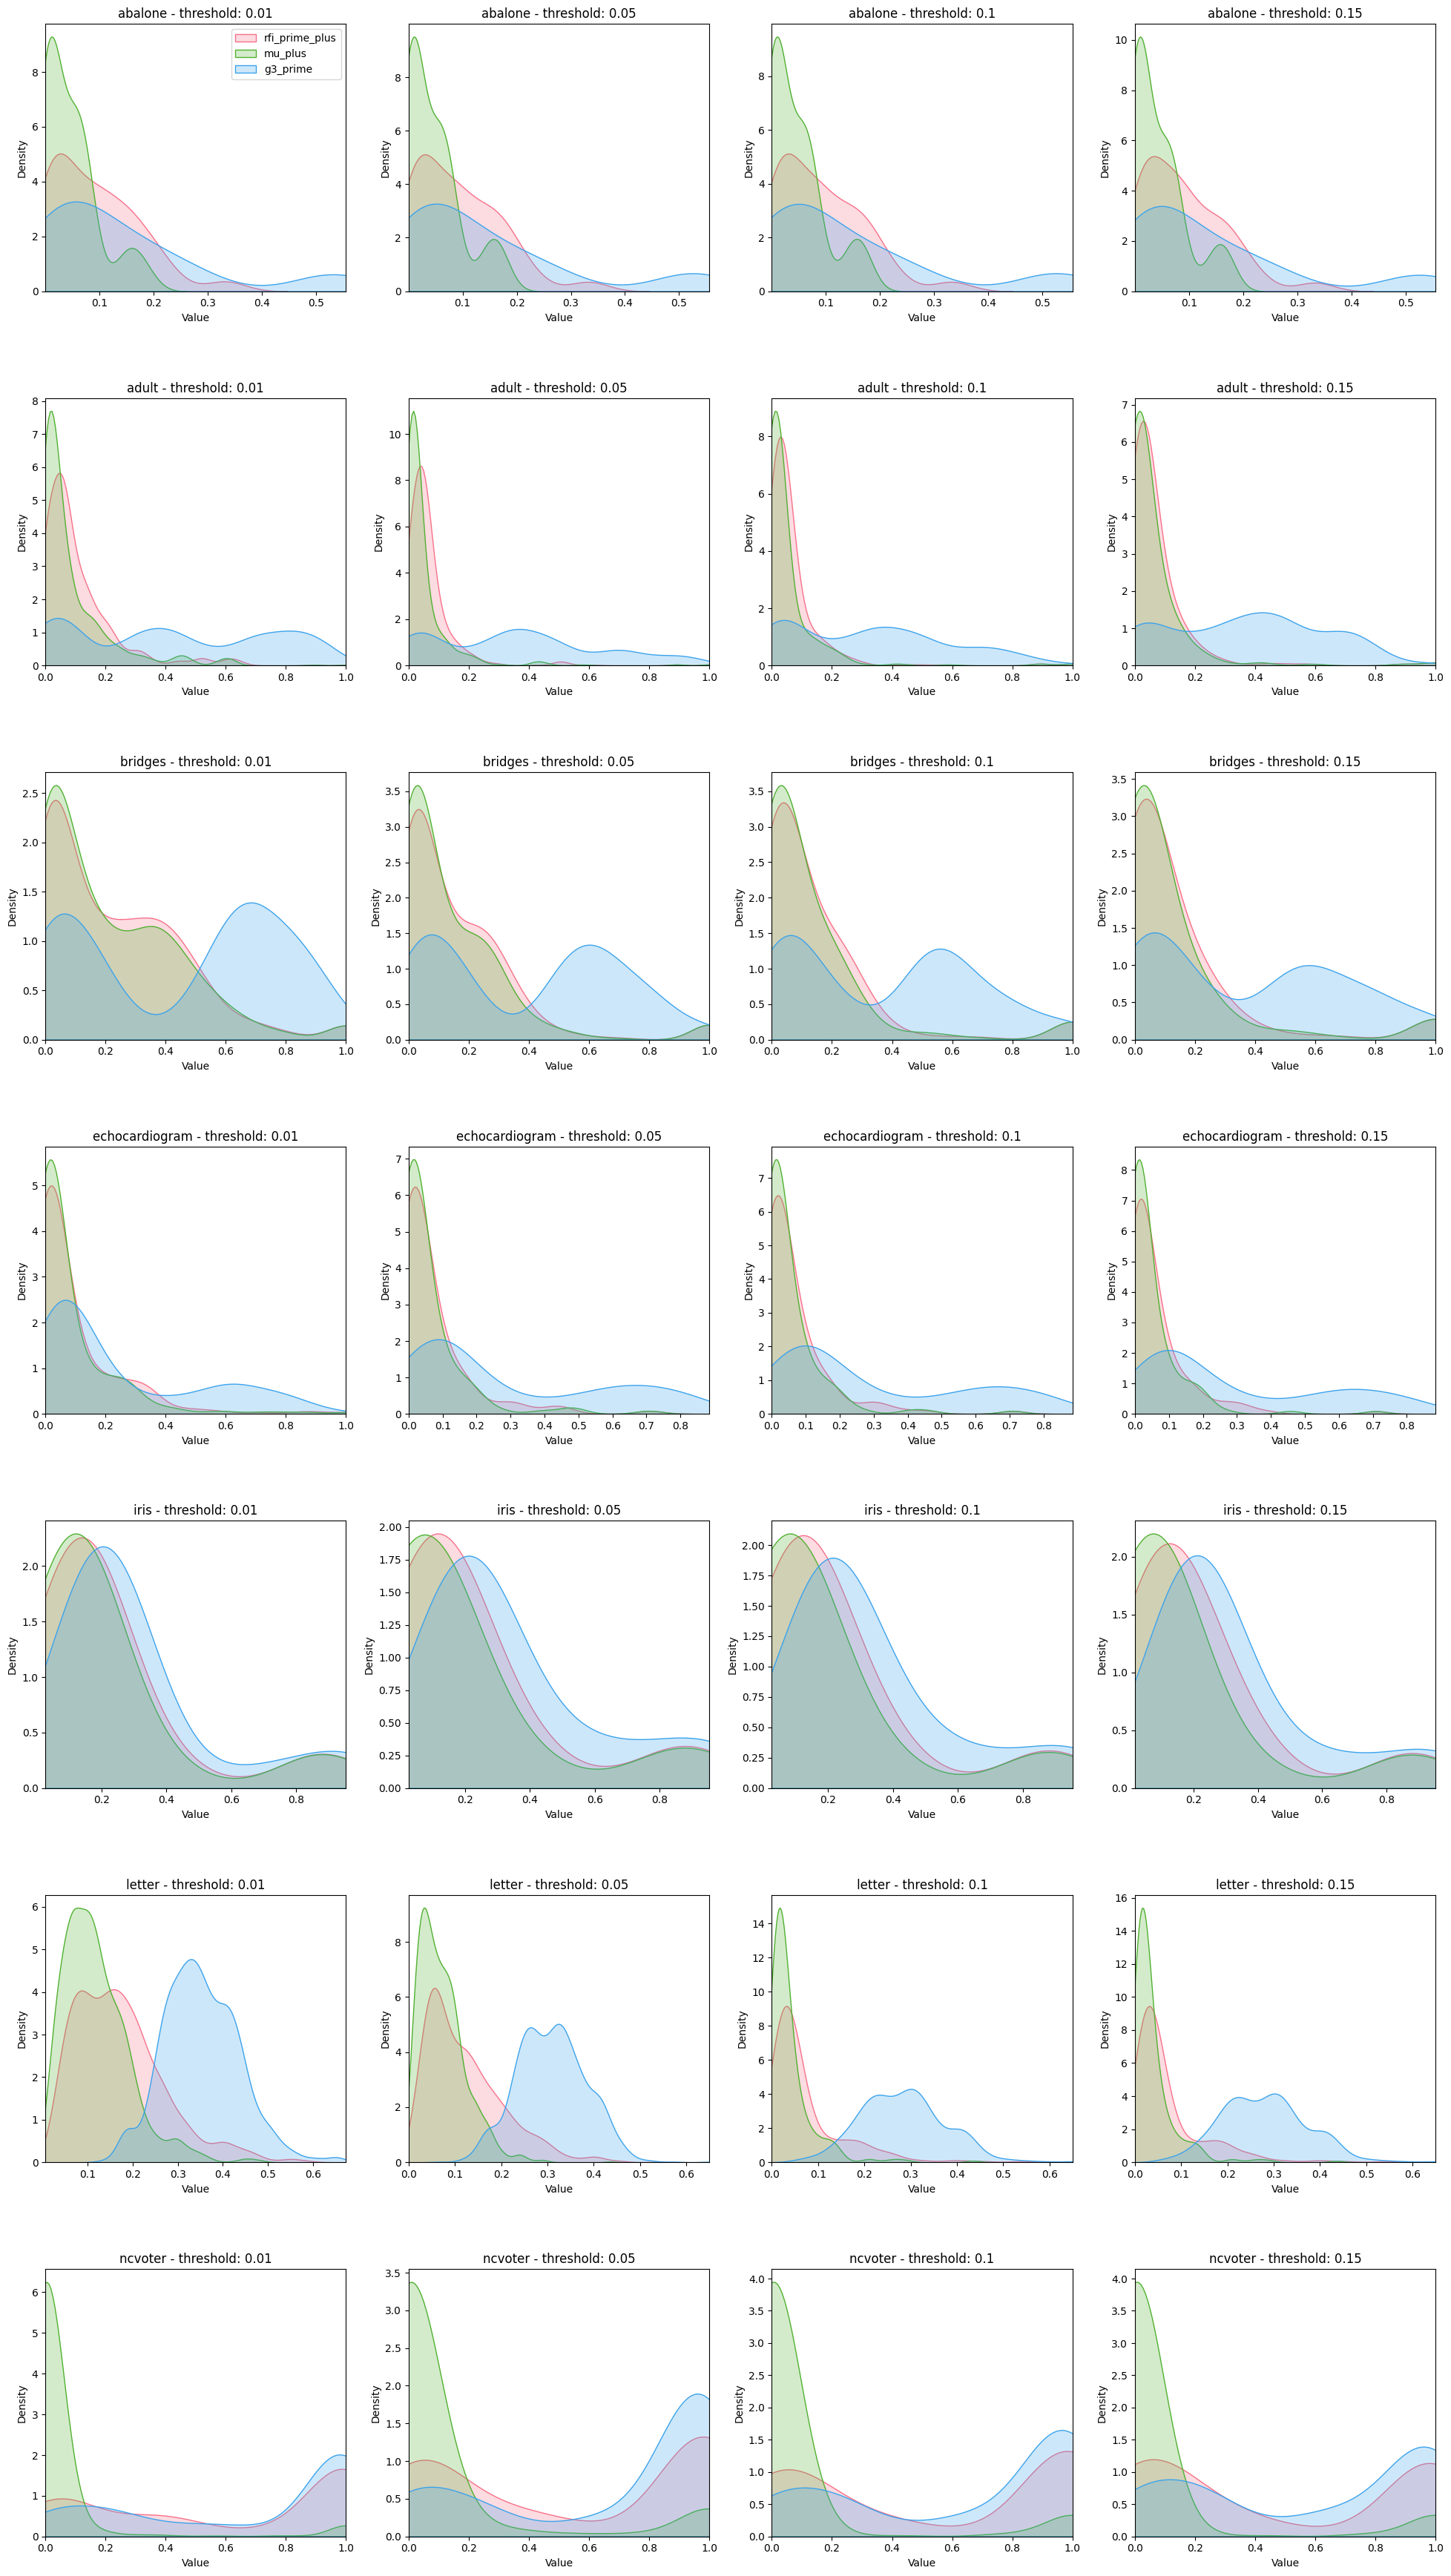

In [17]:
# ... existing code ...

datasets = global_df['dataset'].unique()
thresholds = sorted(global_df['threshold'].unique())

# Create a figure with subplots - one row per dataset, one column per threshold
fig, axes = plt.subplots(len(datasets), len(thresholds), figsize=(20, 5*len(datasets)))
fig.tight_layout(pad=3.0)

# Iterate through datasets (rows)
for i, dataset in enumerate(datasets):
    # Filter data for this dataset
    dataset_df = global_df[global_df['dataset'] == dataset]
    
    # Iterate through thresholds (columns)
    for j, threshold in enumerate(thresholds):
        # Filter data for this threshold
        threshold_df = dataset_df[dataset_df['threshold'] == threshold]
        
        # Set the current subplot
        if len(datasets) == 1:
            ax = axes[j]
        else:
            ax = axes[i, j]
        
        # Plot KDE for each metric on this subplot
        min_value = float("inf")
        max_value = float("-inf")
        
        for idx, col in enumerate(valid_columns):
            series = threshold_df[col].dropna()
            if series.empty:
                continue
            sns.kdeplot(series, label=col, color=palette[idx], fill=True, ax=ax)
            if not series.empty:
                min_value = min(min_value, series.min())
                max_value = max(max_value, series.max())
        
        # Set subplot title and labels
        ax.set_title(f"{dataset} - threshold: {threshold}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
        
        # Only add legend to the first plot to avoid redundancy
        if i == 0 and j == 0:
            ax.legend()
        
        # Set x-axis limits if we have valid data
        if min_value != float("inf") and max_value != float("-inf"):
            ax.set_xlim(min_value, max_value)

plt.subplots_adjust(hspace=0.4)